In [69]:
# Nmae : Himanshu Agarwal , Net id: HXA180027 ,  
#q2.5 Titanic dataset
#mporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#import data using the pandas libraries.
titanic3_dataset = pd.read_csv('titanic3.csv')
titanic3_dataset.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

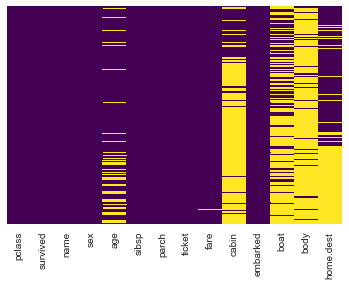

In [71]:
#Heatmap to check the missig values
sns.heatmap(titanic3_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

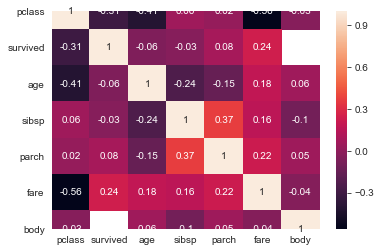

In [72]:
# create a correlation matrix that measures the linear relationships between the variables.
#The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
#We will use the heatmap function from the seaborn library to plot the correlation matrix
correlation_matrix = titanic3_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [73]:
#Through Correlation matrix we can see that few columns are not present which shows they are independent and has no correlation. 
#We can drop those features as they will not play any role in deciding the target feature. 
#So dropping features 'Cabin','body','boat', and 'home.dest'.Same way name and ticket.

In [74]:
titanic3_dataset.drop('cabin',axis=1,inplace=True)
titanic3_dataset.drop('body',axis=1,inplace=True)
titanic3_dataset.drop('boat',axis=1,inplace=True)
titanic3_dataset.drop('home.dest',axis=1,inplace=True)


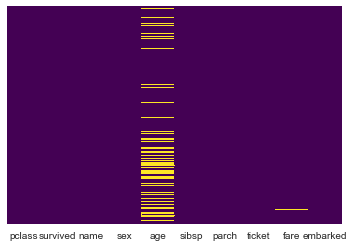

In [75]:
#Heatmap to check the missig values
sns.heatmap(titanic3_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
#Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for 
#reasonable replacement with some form of imputation.



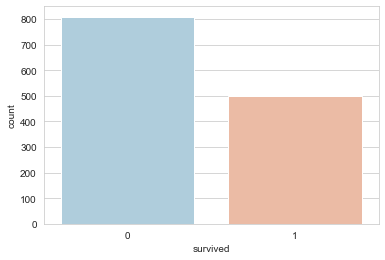

In [77]:
#Data Visualization
#using count plot checking how many passangers survived 
sns.set_style('whitegrid')
sns.countplot(x='survived',data=titanic3_dataset,palette='RdBu_r')


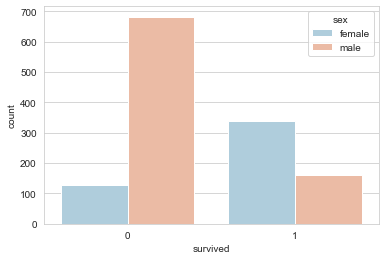

In [78]:
#using count plot checking how many passangers of different genders survived 
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=titanic3_dataset,palette='RdBu_r')


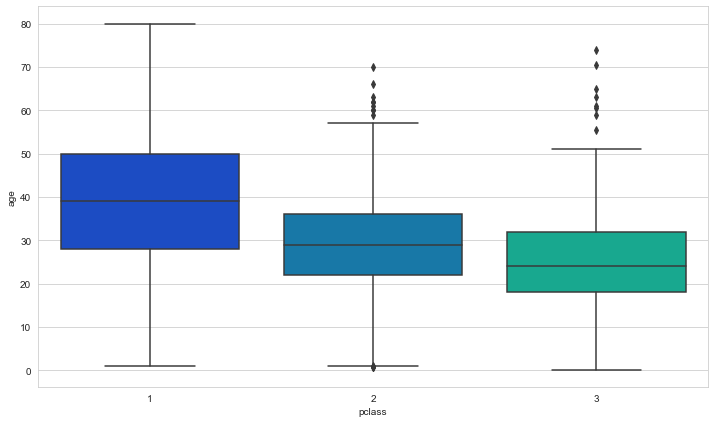

In [79]:
#Data cleaning  
#using box plot checking class wise average age of passangers 
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=titanic3_dataset,palette='winter')


In [80]:
#fill in missing age data instead of just dropping the missing age data rows
#One way to do this is by filling in the mean age of all the passengers (imputation). 
#However we can be smarter about this and check the average age by passenger class.

In [81]:
#Method to get the average age for a class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [82]:
#imputing the missing age values for each class.
titanic3_dataset['age'] = titanic3_dataset[['age','pclass']].apply(impute_age,axis=1)

#to see the count of the missing values left in eachh column
titanic3_dataset.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
dtype: int64

In [83]:
#As the number of rows with null data for fare and embarked are too low as compared to total size of the dataset, so we can drop them.
titanic3_dataset.dropna(inplace=True)


In [84]:
#We’ll need to convert categorical features to dummy variables using pandas! Like 'sex' and 'embarked' features.
#Otherwise our machine learning algorithm won’t be able to directly take in those features as inputs.
#the 'Name' and 'Ticket' column have no relationship with whether the person survived or not,observed using correlation matrix.
#So we drop these 2 columns and we convert the other two columns into numerical values


In [85]:

sex = pd.get_dummies(titanic3_dataset['sex'],drop_first=True)
embark = pd.get_dummies(titanic3_dataset['embarked'],drop_first=True)
titanic3_dataset.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [86]:
#Data is ready to apply Logistic regression
titanic3_dataset.head()

pclass  survived    age  sibsp  parch      fare
0       1         1  29.00      0      0  211.3375
1       1         1   0.92      1      2  151.5500
2       1         0   2.00      1      2  151.5500
3       1         0  30.00      1      2  151.5500
4       1         0  25.00      1      2  151.5500

In [87]:
#Preprocessing of Data for logistic regression

In [88]:
#train the model with 80% of the samples and test with the remaining 20%. 
n = int(len(titanic3_dataset)*0.80)
#spliting data in training and test set
df_train, df_test = titanic3_dataset.iloc[:n, :], titanic3_dataset.iloc[n:, :]
titanic3_dataset.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [89]:
# Initial Coefficients
B = np.array([0, 0, 0, 0, 0, 0]) #Weights array 
alpha = 0.0001 # Learning rate

In [90]:
#Spliting the training and testing data in X,Y train and test sets.
dt = df_train
m = len(df_train.iloc[:,:-1])
x0 = np.ones(m)
Xtrain = np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
ytrain = np.array(dt['survived'])

m = len(df_test.iloc[:,:-1])
x0 = np.ones(m)
dt= df_test
Xtest= np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
ytest= np.array(dt['survived'])

In [91]:
#Cost function 
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [92]:
#Sigmoid fuction to get the result in 0-1 range
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [93]:
import math
def mse(e):
    """Compute the mse for the error vector e."""
    return 1/2*np.mean(e**2)

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - sigmoid(tx.dot(w)) 
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def squareroot(array):
    n = len(array)
    for i in range(n):
        array[i] = math.sqrt(array[i])
    return array

In [94]:
#mplementation of AdaGrad Algorithm for the given numbers of iterations.
def gradient_descent(titanic3_data, B, alpha, iterations):
    cost_history = [0] * iterations
    vt=0
    k=10
    epsilon = 10e-5
    eta=0.01
    r=0.0
    deltaweight = 0.0
    #Small constant
    delta = math.pow(10,-7)
    prev = math.inf
    gamma = 0.9
    for iteration in range(iterations):
       # Sampling the dataset, getting k random records
        dt= titanic3_data.sample(k)
        dt.head()
        m = k
        x0 = np.ones(m)
        #Getting X and Y, from the random sample of size k.
        X1 = np.array([x0, dt['pclass'],dt['age'],dt['sibsp'],dt['parch'],dt['fare']]).T
        Y1 = np.array(dt['survived'])
        grad, err = compute_gradient(Y1, X1, B)
        vt = vt + grad*grad 
        # Changing Values of B using Gradient
        B = B + ((-alpha/(delta+squareroot(vt)))*grad)
        # New Cost Value
        cost = cost_function(X1, Y1, B)
        cost_history[iteration] = cost
        if(abs(cost - prev) < epsilon) :
            print("Reached Convergence !")
            break
        prev = cost
        
    return B, cost_history

In [95]:
alpha= 0.001 #learning rate
iterations=10000
theta , cost = gradient_descent(df_train, B, alpha, iterations)

Reached Convergence !


In [96]:
#Method to predict the value of output feature based on the weights received after training. 
def predict(X, theta):
        return sigmoid(np.dot(X, theta)).round()

In [97]:
#using scikit-learn’s Libraries to get the reports.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [98]:
predictions_train = predict(Xtrain,theta) # Making prediction on training set
print("Classification Report on Training data")
print(classification_report(ytrain,predictions_train))  
print("Accuracy on Training data:",accuracy_score(ytrain, predictions_train))

Classification Report on Training data
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       601
           1       0.68      0.43      0.53       443

    accuracy                           0.67      1044
   macro avg       0.68      0.64      0.64      1044
weighted avg       0.68      0.67      0.66      1044

Accuracy on Training data: 0.6733716475095786


In [99]:
predictions_test = predict(Xtest,theta) # Making prediction on test set
print("Classification Report on test data")
print(classification_report(ytest,predictions_test))  
print("Accuracy on test data:",accuracy_score(ytest, predictions_test))

Classification Report on test data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       207
           1       0.09      0.05      0.07        55

    accuracy                           0.68       262
   macro avg       0.43      0.45      0.44       262
weighted avg       0.63      0.68      0.65       262

Accuracy on test data: 0.683206106870229
